# Jonathan Halverson
# Wednesday, July 19, 2017
# Chapter 3 of Bruce & Bruce

The test statistic is the metric used to the measure the effect of the treatment. The null and alternative hypotheses should account for all possible outcomes. A one-way test counts chance results in only one direction.

If you ask someone to write down the outcome of a series of coin flips they tend to underestimate the number of consectutive heads and tails. For instance, getting 4 or 5 heads in a row in not uncommon in 100 flips.

An exhaustive permutation test is when all possible combinations are considered and the outcome of each is collectively compared to the observed outcome. A bootstrap permutation test involves drawing a bootstrap sample and then doing the test numerically.

Significance testing or hypothesis testing: The p-value is the probability of the observing the given outcome or more extremes outcomes given that the null hypothesis is true. Small values  lead us to side with the alternative hypothesis. The ASA released a statement on p-values. A psychology journal banned the use of p-values because authors were looking for effects without first puttig forth a hypothesis.

Test statistic to t-statistic or t-score to p value.

## Here we consider the birth weight of babies from mothers who smoked and did not smoke

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('nc.csv', header=0)
df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
fage              829 non-null float64
mage              1000 non-null int64
mature            1000 non-null object
weeks             998 non-null float64
premie            998 non-null object
visits            991 non-null float64
marital           999 non-null object
gained            973 non-null float64
weight            1000 non-null float64
lowbirthweight    1000 non-null object
gender            1000 non-null object
habit             999 non-null object
whitemom          998 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 101.6+ KB


In [4]:
df.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [5]:
ns = df[df.habit == 'nonsmoker'].weight.mean()
ns

7.144272623138631

In [6]:
sm = df[df.habit == 'smoker'].weight.mean()
sm

6.828730158730158

In [7]:
ns - sm

0.3155424644084732

We see that the mean baby weight of non-smoking mothers is higher than that of smokers. Is this by chance or is there an effect of smoking? There are 1000 total records.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('halverson')

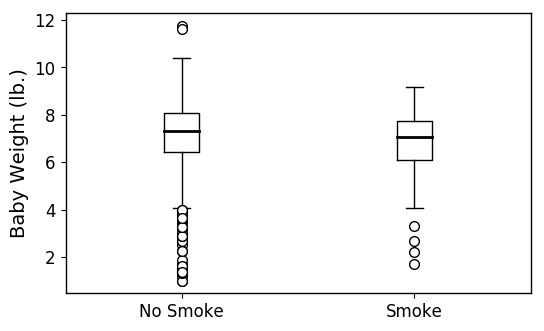

In [9]:
plt.boxplot([df[df.habit == 'nonsmoker'].weight, df[df.habit == 'smoker'].weight], labels=['No Smoke', 'Smoke'])
plt.ylabel('Baby Weight (lb.)')

In [10]:
df[df.habit == 'nonsmoker'].shape

(873, 13)

In [11]:
df[df.habit == 'smoker'].shape

(126, 13)

### Permutation test approach

In [12]:
diffs = []
for _ in range(1000):
     x = np.random.permutation(df.weight)
     diff = x[:873].mean() - x[873:].mean()
     diffs.append(diff)

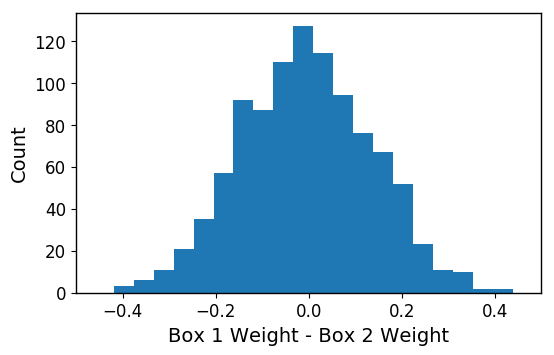

In [13]:
plt.hist(diffs, bins=20)
plt.xlim(-0.5, 0.5)
plt.xlabel('Box 1 Weight - Box 2 Weight')
plt.ylabel('Count')

We see from the histogram above that a difference between the two groups of 0.3 is very unlikely. To be exact:

In [14]:
np.percentile(diffs, q=95)

0.22311966158869201

In [15]:
from scipy.stats import percentileofscore

percentileofscore(diffs, ns - sm)

98.700000000000003

This shows that 98.5 percent of the permutation results were less than the observed difference suggesting that the result is statistically significant (i.e., the difference in weight is not due to chance).

The fraction of permutations that were equal to or greater than the observed outcome is

In [16]:
p_value = 1.0 - percentileofscore(diffs, ns - sm) / 100.0
p_value

0.013000000000000012

### Equation-based approach

In [17]:
y_smk = df[df.habit == 'smoker'].weight
n_smk = df[df.habit == 'nonsmoker'].weight
SE = (y_smk.var() / y_smk.shape[0] + n_smk.var() / n_smk.shape[0])**0.5
t_score = ((ns - sm) - 0.0) / SE
t_score

2.3590109449337278

In [18]:
from scipy.stats import t
p_value = 2 * (1.0 - t.cdf(t_score, min(y_smk.shape[0], n_smk.shape[0]) - 1))
p_value

0.019873628464891269

### Library approach

In [19]:
from scipy.stats import ttest_ind

In [20]:
t_score, p_value = ttest_ind(df[df.habit == 'smoker'].weight, df[df.habit == 'nonsmoker'].weight, equal_var=False)
t_score, p_value

(-2.3590109449335013, 0.01945055644373227)

## ANOVA with permutation applied to batting averages

In [21]:
rf = pd.read_csv('mlbBat10.txt', sep='\t')
rf = rf.head(327)

In [22]:
rf.tail()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
322,G Blum,HOU,SS,93,202,22,54,10,1,2,22,72,15,33,0,0,0.321,0.356,0.267
323,R Johnson,LAD,OF,102,202,24,53,11,2,2,15,74,5,50,2,2,0.291,0.366,0.262
324,B Molina,SF,C,61,202,17,52,6,0,3,17,67,14,19,0,0,0.312,0.332,0.257
325,J Thole,NYM,C,73,202,17,56,7,1,3,17,74,24,25,1,0,0.357,0.366,0.277
326,C Heisey,CIN,OF,97,201,33,51,10,1,8,21,87,16,57,1,2,0.324,0.433,0.254


In [23]:
rf.position.value_counts()

OF    120
SS     42
3B     40
2B     39
C      39
1B     33
DH     14
Name: position, dtype: int64

(0.1, 0.5)

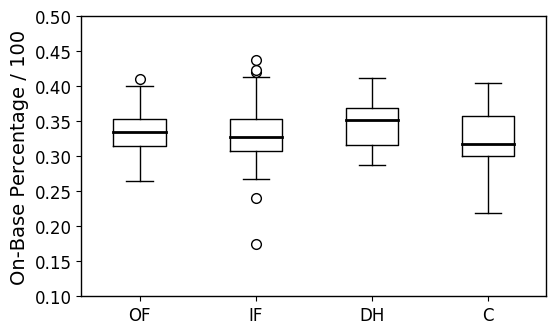

In [24]:
labels_ = ['OF', 'IF', 'DH', 'C']
plt.boxplot([rf[rf.position == 'OF'].OBP, rf[rf.position.isin(['1B', '2B', '3B', 'SS'])].OBP, rf[rf.position == 'DH'].OBP, rf[rf.position == 'C'].OBP], labels=labels_)
plt.ylabel('On-Base Percentage / 100')
plt.ylim(0.1, 0.5)

In [25]:
rf[rf.position == 'OF'].OBP.mean(), rf[rf.position == 'OF'].OBP.shape[0]

(0.33424999999999994, 120)

In [26]:
rf[rf.position.isin(['1B', '2B', '3B', 'SS'])].OBP.mean(), rf[rf.position.isin(['1B', '2B', '3B', 'SS'])].OBP.shape[0]

(0.33152597402597406, 154)

In [27]:
rf[rf.position == 'DH'].OBP.mean(), rf[rf.position == 'DH'].OBP.shape[0]

(0.34778571428571425, 14)

In [28]:
rf[rf.position == 'C'].OBP.mean(), rf[rf.position == 'C'].OBP.shape[0]

(0.32261538461538464, 39)

In [29]:
select = rf[rf.position.isin(['OF', '1B', '2B', '3B', 'SS', 'DH', 'C'])]

In [30]:
select.shape

(327, 19)

In [31]:
of = rf[rf.position == 'OF'].shape[0]
bm = rf[rf.position.isin(['1B', '2B', '3B', 'SS'])].shape[0]
dh = rf[rf.position == 'DH'].shape[0]
cc = rf[rf.position == 'C'].shape[0]

vars_ = []
grand_avg = select.OBP.mean()
for _ in range(100000):
     x = np.random.permutation(select.OBP)
     m1 = x[:of].mean()
     m2 = x[of:of+bm].mean()
     m3 = x[of+bm:of+bm+dh].mean()
     m4 = x[of+bm+dh:].mean()
     vars_.append((m1 - grand_avg)**2 + (m2 - grand_avg)**2 + (m3 - grand_avg)**2 + (m4 - grand_avg)**2)

In [32]:
of, bm, dh, cc

(120, 154, 14, 39)

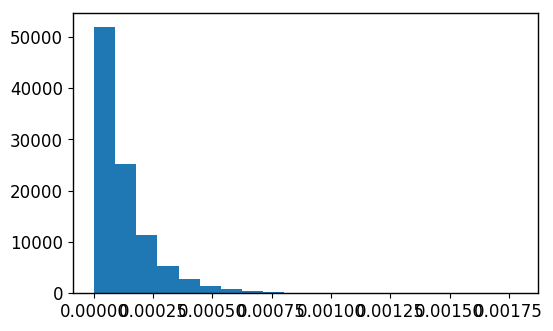

In [33]:
_=plt.hist(vars_, bins=20)

In [34]:
obs = (rf[rf.position == 'OF'].OBP.mean() - grand_avg)**2 + \
      (rf[rf.position.isin(['1B', '2B', '3B', 'SS'])].OBP.mean() - grand_avg)**2 + \
      (rf[rf.position == 'DH'].OBP.mean() - grand_avg)**2 + \
      (rf[rf.position == 'C'].OBP.mean() - grand_avg)**2
obs

0.00034004747400304347

In [35]:
p_value = 1.0 - percentileofscore(vars_, obs) / 100.0
p_value

0.069030000000000036

In [36]:
len(vars_)

100000

In [37]:
percentileofscore(vars_, obs)

93.096999999999994

We see the p-value is greater than 0.05 suggesting that there is insufficient evidence to conclude a difference between groups.

## Power

There are two batters. We feel one has a batting average of 0.300 and the other 0.280. For a significance level of 0.05, what number of at-bats are needed to distinguish the two?

In [79]:
p1 = 0.280
p2 = 0.300
dp12 = p2 - p1
N_values = map(int, np.logspace(2, 4, 50))
p_values = []
for N in N_values:
     hits1 = int(N * p1)
     hits2 = int(N * p2)
     outcomes1 = np.append(np.zeros(N - hits1), np.ones(hits1))
     outcomes2 = np.append(np.zeros(N - hits2), np.ones(hits2))
     total = np.append(outcomes1, outcomes2)
     dfs = []
     for _ in xrange(1000):
          z = np.random.permutation(total)
          diff = z[:N].mean() - z[N:].mean()
          dfs.append(diff)
     dfs = np.array(dfs)
     p_value = dfs[(dfs > dp12) | (dfs < -dp12)].size / float(dfs.size)
     p_values.append(p_value)

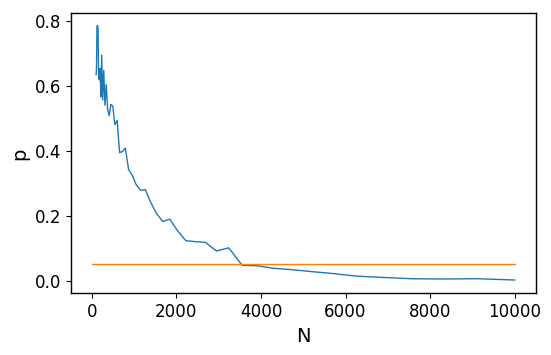

In [80]:
plt.plot(N_values, p_values)
plt.plot([0, N_values[-1]], [0.05, 0.05])
plt.xlabel('N')
plt.ylabel('p')

We see that around N = 4000 is where we can distinguish between the two hitters.

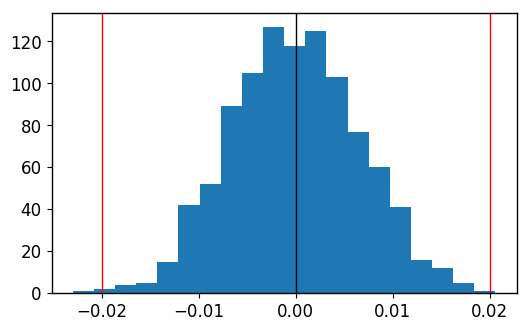

In [81]:
plt.hist(dfs, bins=20)
plt.axvline(dp12, color='r')
plt.axvline(-dp12, color='r')
plt.axvline(0.0, color='k')
#plt.xlim(-0.1, 0.1)